In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [29]:
from chromalab.spectra import Spectra, Illuminant, convert_refs_to_spectras
from chromalab.observer import Observer
from chromalab.maxbasis import MaxBasis
from chromalab.spectral_analysis import PlumageDataLoader, RudermanAnalysis
from chromalab.visualizer import PSWrapper, DisplayBasisType, exportAndPlay
from chromalab.animation import Animation


In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

In [15]:
wavelengths = np.arange(300, 701, 10)
d65 = Illuminant.get("D65")

human_wavelengths = np.arange(400, 701, 10)

trichromat = Observer.trichromat(wavelengths=human_wavelengths, illuminant=d65) 
maxbasis_tri = MaxBasis(trichromat, verbose=True)
LMS_to_RGB = maxbasis_tri.get_cone_to_maxbasis_transform()

100%|██████████| 28/28 [00:00<00:00, 1046.96it/s]


In [4]:
tetrachromat = Observer.bird('UVS-Average-Bird', wavelengths=wavelengths, illuminant=d65, verbose=True)
maxbasis = MaxBasis(tetrachromat, verbose=True)
viz = PSWrapper(tetrachromat, maxbasis, itemsToDisplay=PSWrapper.ItemsToDisplay.MESH, displayBasis=DisplayBasisType.CONE, verbose=True)

100%|██████████| 38/38 [00:00<00:00, 57.87it/s]
/Users/jessicalee/Projects/generalized-colorimetry/code/ChromaLab/chromalab/spectra.py:36: UserWarning: Data has values not between 0 and 1. Clipping.
  warnings.warn("Data has values not between 0 and 1. Clipping.")


[polyscope] Backend: openGL3_glfw -- Loaded openGL version: 4.1 Metal - 83.1


100%|██████████| 21320/21320 [00:50<00:00, 421.78it/s]


In [5]:
# Load Bird PLumage Data
plumage_data_loader = PlumageDataLoader("./data/hummingbird_spectra_300_700_10.npy", tetrachromat)

In [6]:
tetrachromat_analysis = RudermanAnalysis(tetrachromat, plumage_data_loader)

In [7]:
tetrachromat_analysis.doConeResponsePCA()
# tetrachromat_analysis.plotPCA4D(viz, LMS_to_RGB)
# viz.ps.show()

[[ 0.40952551  0.52478978  0.56140623  0.49163766]
 [ 0.29061237  0.69623489 -0.42421658 -0.50084101]
 [-0.4004965   0.14903324  0.67729425 -0.59888575]
 [ 0.76644364 -0.46652091  0.21479256 -0.38572859]]
[ 0.70096335  0.19373892  0.07257152  0.03272621]


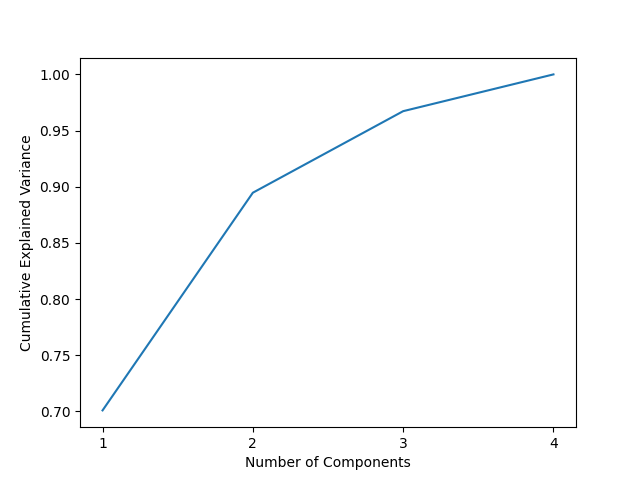

In [25]:
tetrachromat_analysis.plotExplainedRatio()

In [28]:
tetrachromat_analysis.plotPCA4DwUV(viz)
viz.ps.show()

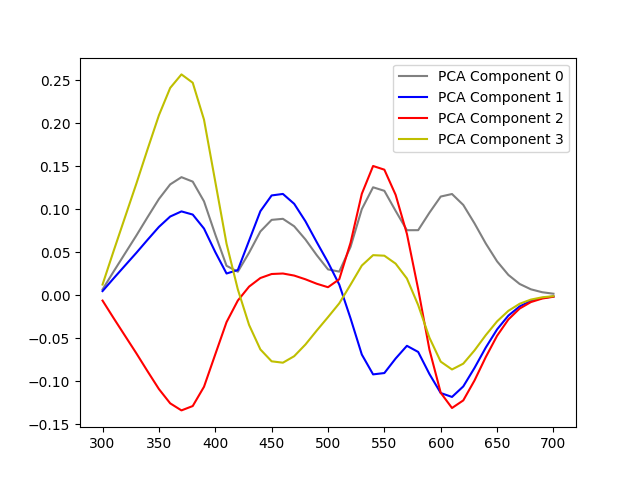

In [8]:
tetrachromat_analysis.plotTransformedConeFunds()

In [9]:
# np.savetxt("./outputs/data_pcs_bird_comp.csv", tetrachromat_analysis.spectra_to_PCA, delimiter=',')